# Week 3 : topics

* Derivative, 
* Integration
* root finding
* optimization
* Interpolation
* Review 2D random walk

## project: calculating value of $\pi$ using random numbers

In [2]:
# Derivative:
#. f(x) = x^2 + 5x -4
#. df/dx = 2x + 5
# evaluation at (x=1) : df/dx at (x=1) = 7

import numpy as np
import matplotlib.pyplot as plt
from  scipy.misc import derivative

def func(x):
    return x**2 + 5*x -4

df = derivative(func, x0=2.)

#df = derivative(func, x0=2., args=(a, b))

print (df)

9.0


In [7]:
# Integration

# f(x) = x^2 + 5x -4
# \int_0 ^1 f(x) dx = x^3/3 + 5*x^2/2 -4x = 1/3 + 5/2 -4 

I_exact = (1/3 + 5/2 -4 )

from scipy.integrate import quad

I, err = quad( func, 0, 1)

print ('I_exact=', I_exact, 'I_num=', I, 'err=',err)

I_exact= -1.1666666666666665 I_num= -1.1666666666666665 err= 1.9483999847243102e-14


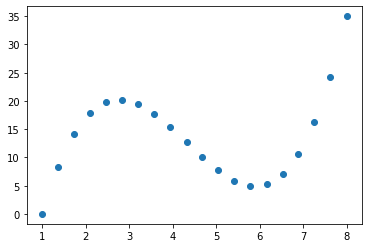

In [19]:
# Integration of a data set

# method 1
# data = np.loadtxt('data.dat')

#print (data.shape)
#print (data)

#x = data[:,0]
#y = data[:,1]
#print (x)
#print (y)


# method 2
data = np.loadtxt('data.dat').T
(x, y) = data

plt.plot(x, y, 'o')

In [23]:
from scipy.integrate import trapz, simps

I_t = trapz(y, x)
print('I_trapz:', I_t)

I_s = simps(y, x)
print ('I_simps:',I_s)

I_trapz: 94.0112
I_simps: 93.93663963963965


[-3.76415182  5.31434703]


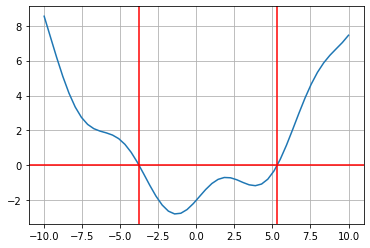

In [31]:
# Root finding methods

# f(x) = 0
# 0.1 x^2 + sin(x) -2 = 0.

def func(x):
    return 0.1 * x**2 + np.sin(x) - 2.

xx = np.linspace(-10, 10, 50)
yy = func(xx)

plt.plot(xx, yy)
plt.grid()

from scipy.optimize import root

roots = root(func, x0=[-3, 8]);

roots_x = roots.x

print (roots_x)

plt.axvline(x = roots_x[0], color='red')
plt.axvline(x = roots_x[1], color='red')

plt.axhline(y = 0, color='red')


[-1.30644015]


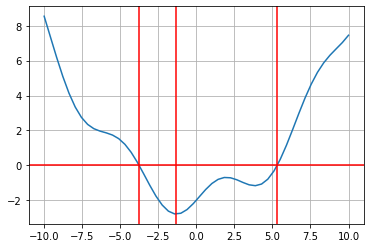

In [43]:
# Optimization of a function

from scipy.optimize import minimize

#print (minimize(func, x0=0) )

res = minimize(func, x0=0) 
xmin = res.x

print (xmin)

plt.plot(xx, yy)
plt.grid()

plt.axvline(x = roots_x[0], color='red')
plt.axvline(x = roots_x[1], color='red')

plt.axhline(y = 0, color='red')
plt.axvline(x=xmin, color='red')



(2, 20)
15.025815701453958


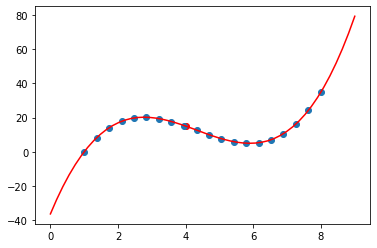

In [50]:
# Interpolation

# method 2
data = np.loadtxt('data.dat').T
print (data.shape)
(x, y) = data

plt.plot(x, y, 'o')

from scipy.interpolate import UnivariateSpline

f = UnivariateSpline(x, y, s=0)

print (f(4) )

plt.scatter([4], f(4), color='red')

xx = np.linspace(0, 9, 50)
yy = f(xx)

plt.plot(xx, yy, color='red')


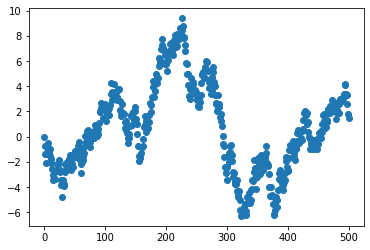

In [53]:
# Random walk in 1D

counter = [0]

steps = 500
for i in range(steps):
    # np.random.rand() gives number in range [0, 1)
    r = 2*np.random.rand() -1
    next_num = counter[-1] + r
    counter.append( next_num )

#print (counter)

plt.plot(counter, 'o')

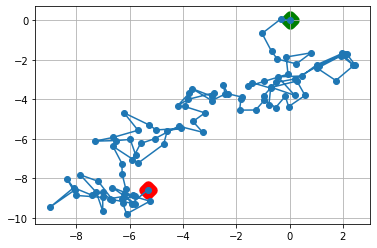

In [68]:
# Random walk in 2D

counter = [  [0, 0]    ]

steps = 100
for i in range(steps):
    rx = 2*np.random.rand() -1  # in range[-1, 1]
    ry = 2*np.random.rand() -1  # in range[-1, 1]
    
    last_pt = np.array(counter[-1])
    r = np.array([rx, ry])
    
    next_pt = last_pt + r
    
    counter.append( next_pt )

#print (counter)

counter = np.array(counter)

#print (counter.shape)
plt.plot( counter[:,0], counter[:,1], 'o-' )

plt.scatter( counter[ 0][0], counter[ 0][1], marker='D', lw=10, color='green' )
plt.scatter( counter[-1][0], counter[-1][1], marker='D', lw=10, color='red' )

plt.grid()



In [55]:
l1= [1,2]
l2 = [3,4]
l1+l2

[1, 2, 3, 4]

<img src="circ.png" style="width: 200px;"/>

area of circle (radius=1) : $\pi$

area of square (length=2*radius = 2) : $(2^2)$ = 4 

ratio: $\pi$/4 =$A_{circle}/A_{square}$= $N_{circle}/N_{square}$

In [76]:
# Calculating value of pi

steps = 500

N_circle  =0
N_outside_circle = 0
N_total = 0

for i in  range(steps):
    
    rx = 2*np.random.rand() -1  
    ry = 2*np.random.rand() -1
    
    l = np.sqrt(  rx**2 + ry**2  )
    
    # compare length with radius, radius =1. in this case;
    
    if l <= 1.:
        N_circle = N_circle +1
        #N_circle += 1
    else:
        N_outside_circle +=1 
        
    N_total  = N_total + 1
    
print (N_total, N_circle, N_outside_circle)
#print (N_total)

pi = 4.0* N_circle/ N_total

err = (pi-np.pi)/np.pi *100

print ('exact value:', np.pi, 'calculated value:', pi, 'error:', err, '%')

500 390 110
exact value: 3.141592653589793 calculated value: 3.12 error: -0.6873155106573032 %
